In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statistics
import math
from sklearn.metrics import accuracy_score
from sklearn import metrics
from  scipy.io import arff
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# import tensorflow.keras.backend as K

In [2]:
# data_run = pd.read_csv("sgemm_product.csv",index_col=False)
# data_run["runavg (ms)"] = (data_run["Run1 (ms)"]+data_run["Run2 (ms)"]+data_run["Run3 (ms)"]+data_run["Run4 (ms)"])/4
# data_run["log_run"] = np.where(data_run['runavg (ms)']>statistics.median(data_run["runavg (ms)"]), 1.0, 0.0)
# data_run=data_run.drop(["runavg (ms)", "Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
# data_run

In [3]:
# X= data_run.iloc[:,:14]
# Y=data_run.iloc[:,-1]
# X_c= X
# Y_c= Y
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
# scaler = StandardScaler()
# x_train=scaler.fit_transform(X_train)
# x_test=scaler.fit_transform(X_test)

In [2]:
data_med = arff.loadarff('messidor_features.arff')
data_med = pd.DataFrame(data_med[0])
data_med.shape
#data = np.array(dataset['data'])

(1151, 20)

In [3]:
data_med.rename(columns={'0': 'QUALITY','1':'SCREENING','2':'MA1','3':'MA2','4':'MA3','5':'MA4','6':'MA5','7':'MA6','8':'EX1','9':'EX2','10':'EX3','11':'EX4','12':'EX5','13':'EX6','14':'EX7','15':'EX8','16':'DISTANCE','17':'DIAMETER','18':'AM_FM_CLASS'}, index={'ONE': 'one'}, inplace=True)
data_med['RESULT']=0
for i in range(0,data_med.shape[0]):
    if (data_med['Class'][i]==b'\x30'):
        data_med['RESULT'][i]=0
    elif(data_med['Class'][i]==b'\x31'):
        data_med['RESULT'][i]=1
    else:
        data_med['RESULT'][i]='NAN'

In [4]:
data_med.isnull().sum()

QUALITY        0
SCREENING      0
MA1            0
MA2            0
MA3            0
MA4            0
MA5            0
MA6            0
EX1            0
EX2            0
EX3            0
EX4            0
EX5            0
EX6            0
EX7            0
EX8            0
DISTANCE       0
DIAMETER       0
AM_FM_CLASS    0
Class          0
RESULT         0
dtype: int64

In [5]:
X2=data_med.drop(['RESULT','Class'],axis=1)
Y2=data_med['RESULT']

In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.30,random_state=23)
scaler = StandardScaler()
x_train2=scaler.fit_transform(X_train2)
x_test2=scaler.fit_transform(X_test2)

In [19]:
knn = KNeighborsClassifier(n_neighbors=33, metric='euclidean')
knn.fit(x_train2, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=33, p=2,
                     weights='uniform')

In [20]:
y_pred_train2=knn.predict(x_train2)
y_pred_test2=knn.predict(x_test2)

In [21]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.6857142857142857
Accuracy Score for Test data: 0.5895953757225434


### Experimenting KNN by looping over k . Rule of thumb of k= sqrt(n) which is 33 here (sqrt(1151))

In [28]:
train_acc2=[]
test_acc2=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train2, y_train2)
    y_pred_train2=knn.predict(x_train2)
    y_pred_test2=knn.predict(x_test2)
    train_acc2.append(metrics.accuracy_score(y_train2,y_pred_train2))
    test_acc2.append(metrics.accuracy_score(y_test2,y_pred_test2))

In [36]:
for i in range(1,50):
    print(i,train_acc2[i-1])

1 1.0
2 0.7975155279503106
3 0.8198757763975155
4 0.7590062111801242
5 0.760248447204969
6 0.7366459627329193
7 0.7478260869565218
8 0.7354037267080745
9 0.746583850931677
10 0.7180124223602484
11 0.7204968944099379
12 0.7130434782608696
13 0.7180124223602484
14 0.7118012422360248
15 0.7142857142857143
16 0.7031055900621118
17 0.7068322981366459
18 0.7080745341614907
19 0.6968944099378882
20 0.6944099378881987
21 0.6956521739130435
22 0.7006211180124223
23 0.7018633540372671
24 0.7031055900621118
25 0.7018633540372671
26 0.7018633540372671
27 0.6919254658385093
28 0.6832298136645962
29 0.6795031055900621
30 0.6770186335403726
31 0.6770186335403726
32 0.6782608695652174
33 0.6857142857142857
34 0.6782608695652174
35 0.6832298136645962
36 0.6819875776397516
37 0.6869565217391305
38 0.6795031055900621
39 0.6819875776397516
40 0.6795031055900621
41 0.6795031055900621
42 0.675776397515528
43 0.6782608695652174
44 0.675776397515528
45 0.6869565217391305
46 0.6782608695652174
47 0.68198757763

In [37]:
for i in range(1,50):
    print(i,test_acc2[i-1])

1 0.5895953757225434
2 0.5260115606936416
3 0.6127167630057804
4 0.5664739884393064
5 0.6098265895953757
6 0.569364161849711
7 0.6011560693641619
8 0.5751445086705202
9 0.5924855491329479
10 0.5664739884393064
11 0.5982658959537572
12 0.5751445086705202
13 0.6040462427745664
14 0.5982658959537572
15 0.6011560693641619
16 0.5867052023121387
17 0.6011560693641619
18 0.5867052023121387
19 0.6098265895953757
20 0.5867052023121387
21 0.5809248554913294
22 0.5867052023121387
23 0.5982658959537572
24 0.5867052023121387
25 0.5982658959537572
26 0.5895953757225434
27 0.6040462427745664
28 0.5895953757225434
29 0.5924855491329479
30 0.5780346820809249
31 0.5895953757225434
32 0.5780346820809249
33 0.5895953757225434
34 0.5867052023121387
35 0.5867052023121387
36 0.569364161849711
37 0.5809248554913294
38 0.5664739884393064
39 0.5838150289017341
40 0.5664739884393064
41 0.5867052023121387
42 0.5751445086705202
43 0.5809248554913294
44 0.5520231213872833
45 0.5635838150289018
46 0.5404624277456648

Text(0.5, 1.0, 'number of K Vs Accuracy : Train')

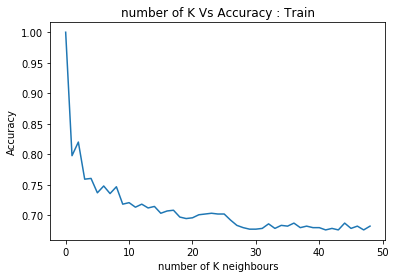

In [40]:
plt.plot(train_acc2)
plt.ylabel('Accuracy')
plt.xlabel('number of K neighbours')
plt.title('number of K Vs Accuracy : Train')
# +'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

Text(0.5, 1.0, 'number of K Vs Accuracy : Test ')

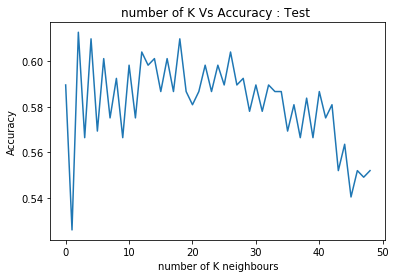

In [41]:
plt.plot(test_acc2)
plt.ylabel('Accuracy')
plt.xlabel('number of K neighbours')
plt.title('number of K Vs Accuracy : Test ')
# +'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

### Finalyzing k=19 as it gives train acc= 69.68 and test accuracy= 60.98. When the number of classes are 2, k should be odd.

## Dataset- Runtime

In [2]:
data_run = pd.read_csv("sgemm_product.csv",index_col=False)
data_run["runavg (ms)"] = (data_run["Run1 (ms)"]+data_run["Run2 (ms)"]+data_run["Run3 (ms)"]+data_run["Run4 (ms)"])/4
data_run["log_run"] = np.where(data_run['runavg (ms)']>statistics.median(data_run["runavg (ms)"]), 1.0, 0.0)
data_run=data_run.drop(["runavg (ms)", "Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
data_run

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0.0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0.0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0.0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0.0


In [3]:
X= data_run.iloc[:,:14]
Y=data_run.iloc[:,-1]
X_c= X
Y_c= Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
scaler = StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)
data_run.shape

(241600, 15)

In [52]:
knn = KNeighborsClassifier(n_neighbors=490, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=490, p=2,
                     weights='uniform')

In [53]:
y_pred_train=knn.predict(x_train)
y_pred_test=knn.predict(x_test)

In [54]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.8566579943235573
Accuracy Score for Test data: 0.8573951434878587


In [6]:
train_acc=[]
test_acc=[]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred_train=knn.predict(x_train)
    y_pred_test=knn.predict(x_test)
    train_acc.append(metrics.accuracy_score(y_train,y_pred_train))
    test_acc.append(metrics.accuracy_score(y_test,y_pred_test))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
  for i in range(99):
    print(i+1,train_acc[i])

1 1.0
2 0.9309661778618732
3 0.9529446546830653
4 0.9289675969725638
5 0.9350461210974456
6 0.9222622989593188
7 0.9231610690633869
8 0.9137949385052034
9 0.9139841532639545
10 0.9056587038789026
11 0.9059188741721854
12 0.8983621097445601
13 0.8985690633869442
14 0.8925614947965941
15 0.8936435666982024
16 0.8894512771996216
17 0.8904564806054872
18 0.8873994796594135
19 0.8878133869441817
20 0.8856196783349102
21 0.8859035004730369
22 0.8839699621570483
23 0.8841355250709555
24 0.882426679280984
25 0.8823793755912961
26 0.8807060075685903
27 0.8801856669820246
28 0.8792809839167455
29 0.878926206244087
30 0.878015610217597
31 0.8770281456953642
32 0.8765551087984863
33 0.875934247871334
34 0.8762653736991486
35 0.8757982497634815
36 0.8758810312204351
37 0.8750946073793756
38 0.8753133869441816
39 0.87475756859035
40 0.8746393093661305
41 0.8739001892147588
42 0.8743436613055818
43 0.8737701040681173
44 0.874314096499527
45 0.8742490539262062
46 0.8744205298013245
47 0.87412488174077

In [11]:
  for i in range(99):
    print(i+1,test_acc[i])

1 0.8670115894039735
2 0.8585540838852097
3 0.8848233995584989
4 0.871067880794702
5 0.8852924944812363
6 0.8753449227373068
7 0.8820088300220751
8 0.8730132450331126
9 0.8782146799116998
10 0.8703090507726269
11 0.8738824503311259
12 0.8675496688741722
13 0.870819536423841
14 0.8657146799116998
15 0.8694950331125828
16 0.8652869757174393
17 0.86844646799117
18 0.8659630242825607
19 0.8685430463576159
20 0.8655629139072848
21 0.8670943708609271
22 0.8647213024282561
23 0.8658940397350994
24 0.8630380794701987
25 0.8646109271523179
26 0.8630242825607064
27 0.8643763796909493
28 0.8637555187637969
29 0.8644867549668874
30 0.8636865342163356
31 0.8645281456953643
32 0.8637279249448123
33 0.8641970198675497
34 0.8640176600441501
35 0.8645971302428256
36 0.8645281456953643
37 0.8652317880794702
38 0.8648730684326711
39 0.8645005518763796
40 0.8639762693156733
41 0.864817880794702
42 0.8646937086092715
43 0.8654663355408388
44 0.8654801324503312
45 0.8654939293598234
46 0.865880242825607
47 

Text(0.5, 1.0, 'number of K Vs Accuracy : Train')

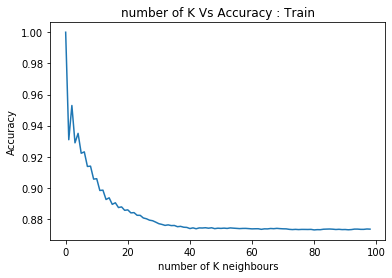

In [7]:
plt.plot(train_acc)
plt.ylabel('Accuracy')
plt.xlabel('number of K neighbours')
plt.title('number of K Vs Accuracy : Train')
# +'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

Text(0.5, 1.0, 'number of K Vs Accuracy : Test')

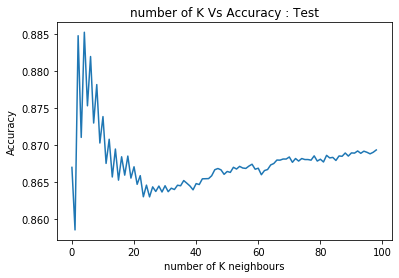

In [8]:
plt.plot(test_acc)
plt.ylabel('Accuracy')
plt.xlabel('number of K neighbours')
plt.title('number of K Vs Accuracy : Test')
# +'\n'+'Original accuracy:{}'.format(round(original_accuracy2,5)))

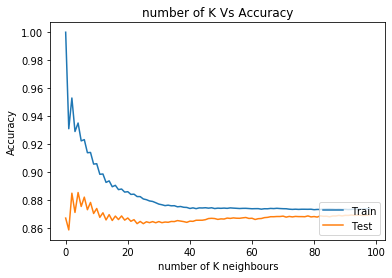

In [12]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('number of K Vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('number of K neighbours')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Neural Networks

## Datset- Diabetic retinopathy

In [7]:
np.random.seed(22)
model = Sequential()
model.add(Dense(12, input_dim=19, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
X_train2 = np.asarray(X_train2)
y_train2 = np.asarray(y_train2)
X_test2 = np.asarray(X_test2)
y_test2 = np.asarray(y_test2)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=150, batch_size=10)

Train on 805 samples, validate on 346 samples
Epoch 1/150
805/805 [==============================] - 1s 1ms/sample - loss: 0.4290 - accuracy: 0.7938 - val_loss: 0.6826 - val_accuracy: 0.6416
Epoch 2/150
805/805 [==============================] - 0s 375us/sample - loss: 0.4387 - accuracy: 0.7888 - val_loss: 0.5281 - val_accuracy: 0.7457
Epoch 3/150
805/805 [==============================] - 0s 350us/sample - loss: 0.4311 - accuracy: 0.7913 - val_loss: 0.5313 - val_accuracy: 0.7052
Epoch 4/150
805/805 [==============================] - 0s 390us/sample - loss: 0.4231 - accuracy: 0.8075 - val_loss: 0.5706 - val_accuracy: 0.7168
Epoch 5/150
805/805 [==============================] - 0s 516us/sample - loss: 0.4249 - accuracy: 0.8075 - val_loss: 0.5655 - val_accuracy: 0.7081
Epoch 6/150
805/805 [==============================] - 0s 392us/sample - loss: 0.4152 - accuracy: 0.8099 - val_loss: 0.5360 - val_accuracy: 0.7197
Epoch 7/150
805/805 [==============================] - 0s 486us/sample - l

805/805 [==============================] - 0s 549us/sample - loss: 0.4290 - accuracy: 0.7913 - val_loss: 0.6021 - val_accuracy: 0.6792
Epoch 112/150
805/805 [==============================] - 0s 620us/sample - loss: 0.4308 - accuracy: 0.7814 - val_loss: 0.5759 - val_accuracy: 0.6850
Epoch 113/150
805/805 [==============================] - 0s 561us/sample - loss: 0.4335 - accuracy: 0.7988 - val_loss: 0.5522 - val_accuracy: 0.6850
Epoch 114/150
805/805 [==============================] - 0s 493us/sample - loss: 0.4119 - accuracy: 0.8062 - val_loss: 0.5633 - val_accuracy: 0.6763
Epoch 115/150
805/805 [==============================] - 0s 391us/sample - loss: 0.4133 - accuracy: 0.8087 - val_loss: 0.6136 - val_accuracy: 0.6763
Epoch 116/150
805/805 [==============================] - 0s 559us/sample - loss: 0.4100 - accuracy: 0.8112 - val_loss: 0.6220 - val_accuracy: 0.6734
Epoch 117/150
805/805 [==============================] - 0s 470us/sample - loss: 0.4220 - accuracy: 0.7963 - val_loss: 0

In [39]:
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)

In [40]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.768944099378882
Accuracy Score for Test data: 0.6734104046242775


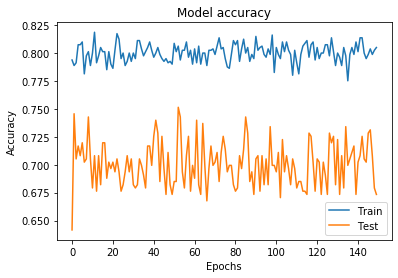

In [44]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
# plt.ylim(0.6, 0.9)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Activation function- Relu and sigmoid

### Experimenting with hidden layer and hyperparameters: epochs=150 and batch_size=40

In [63]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=150, batch_size=40)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)

Train on 805 samples, validate on 346 samples
Epoch 1/150
805/805 [==============================] - 1s 1ms/sample - loss: 0.9920 - accuracy: 0.5118 - val_loss: 0.8246 - val_accuracy: 0.4595
Epoch 2/150
805/805 [==============================] - 0s 107us/sample - loss: 0.7798 - accuracy: 0.5553 - val_loss: 0.7514 - val_accuracy: 0.5260
Epoch 3/150
805/805 [==============================] - 0s 117us/sample - loss: 0.7338 - accuracy: 0.5615 - val_loss: 0.7292 - val_accuracy: 0.5751
Epoch 4/150
805/805 [==============================] - 0s 102us/sample - loss: 0.7143 - accuracy: 0.5640 - val_loss: 0.7117 - val_accuracy: 0.5780
Epoch 5/150
805/805 [==============================] - 0s 115us/sample - loss: 0.7064 - accuracy: 0.5466 - val_loss: 0.7072 - val_accuracy: 0.5983
Epoch 6/150
805/805 [==============================] - 0s 108us/sample - loss: 0.7025 - accuracy: 0.5478 - val_loss: 0.7041 - val_accuracy: 0.6012
Epoch 7/150
805/805 [==============================] - 0s 110us/sample - l

805/805 [==============================] - 0s 111us/sample - loss: 0.5328 - accuracy: 0.7565 - val_loss: 0.6488 - val_accuracy: 0.6618
Epoch 112/150
805/805 [==============================] - 0s 121us/sample - loss: 0.5162 - accuracy: 0.7727 - val_loss: 0.6361 - val_accuracy: 0.6561
Epoch 113/150
805/805 [==============================] - 0s 218us/sample - loss: 0.5189 - accuracy: 0.7776 - val_loss: 0.6121 - val_accuracy: 0.6705
Epoch 114/150
805/805 [==============================] - 0s 202us/sample - loss: 0.5129 - accuracy: 0.7689 - val_loss: 0.6079 - val_accuracy: 0.6850
Epoch 115/150
805/805 [==============================] - 0s 165us/sample - loss: 0.5116 - accuracy: 0.7714 - val_loss: 0.6242 - val_accuracy: 0.6734
Epoch 116/150
805/805 [==============================] - 0s 107us/sample - loss: 0.5146 - accuracy: 0.7863 - val_loss: 0.6010 - val_accuracy: 0.6879
Epoch 117/150
805/805 [==============================] - 0s 108us/sample - loss: 0.5117 - accuracy: 0.7615 - val_loss: 0

In [64]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.7850931677018633
Accuracy Score for Test data: 0.6791907514450867


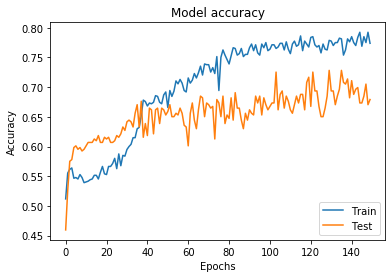

In [65]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=100 and batch_size=160

In [66]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=100, batch_size=160)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)

Train on 805 samples, validate on 346 samples
Epoch 1/100
805/805 [==============================] - 1s 1ms/sample - loss: 3.9191 - accuracy: 0.4957 - val_loss: 2.3506 - val_accuracy: 0.6127
Epoch 2/100
805/805 [==============================] - 0s 39us/sample - loss: 2.6854 - accuracy: 0.4957 - val_loss: 1.5604 - val_accuracy: 0.6127
Epoch 3/100
805/805 [==============================] - 0s 43us/sample - loss: 1.6936 - accuracy: 0.4944 - val_loss: 0.9662 - val_accuracy: 0.6040
Epoch 4/100
805/805 [==============================] - 0s 42us/sample - loss: 1.0196 - accuracy: 0.4894 - val_loss: 0.6843 - val_accuracy: 0.5838
Epoch 5/100
805/805 [==============================] - 0s 50us/sample - loss: 0.7243 - accuracy: 0.5267 - val_loss: 0.6509 - val_accuracy: 0.5723
Epoch 6/100
805/805 [==============================] - 0s 53us/sample - loss: 0.6753 - accuracy: 0.5516 - val_loss: 0.6757 - val_accuracy: 0.5405
Epoch 7/100
805/805 [==============================] - 0s 52us/sample - loss: 0

In [67]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.6819875776397516
Accuracy Score for Test data: 0.6358381502890174


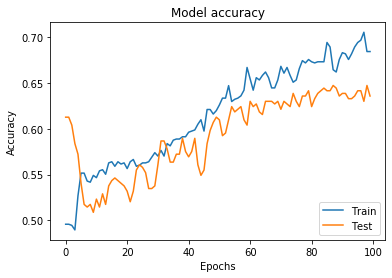

In [68]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=200 and batch_size=100

In [69]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=200, batch_size=100)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/200
805/805 [==============================] - 1s 1ms/sample - loss: 3.5633 - accuracy: 0.5217 - val_loss: 2.5287 - val_accuracy: 0.5289
Epoch 2/200
805/805 [==============================] - 0s 51us/sample - loss: 1.6760 - accuracy: 0.5366 - val_loss: 1.4268 - val_accuracy: 0.5896
Epoch 3/200
805/805 [==============================] - 0s 60us/sample - loss: 1.1346 - accuracy: 0.5180 - val_loss: 0.9912 - val_accuracy: 0.5925
Epoch 4/200
805/805 [==============================] - 0s 59us/sample - loss: 0.8291 - accuracy: 0.5789 - val_loss: 0.9193 - val_accuracy: 0.5173
Epoch 5/200
805/805 [==============================] - 0s 72us/sample - loss: 0.7545 - accuracy: 0.5988 - val_loss: 0.7225 - val_accuracy: 0.5665
Epoch 6/200
805/805 [==============================] - 0s 76us/sample - loss: 0.6859 - accuracy: 0.5988 - val_loss: 0.6731 - val_accuracy: 0.6098
Epoch 7/200
805/805 [==============================] - 0s 58us/sample - loss: 0

Epoch 112/200
805/805 [==============================] - 0s 63us/sample - loss: 0.5955 - accuracy: 0.7205 - val_loss: 0.5885 - val_accuracy: 0.6965
Epoch 113/200
805/805 [==============================] - 0s 56us/sample - loss: 0.4892 - accuracy: 0.7528 - val_loss: 0.6268 - val_accuracy: 0.6503
Epoch 114/200
805/805 [==============================] - 0s 57us/sample - loss: 0.4852 - accuracy: 0.7491 - val_loss: 0.5811 - val_accuracy: 0.6734
Epoch 115/200
805/805 [==============================] - 0s 62us/sample - loss: 0.4692 - accuracy: 0.7677 - val_loss: 0.5865 - val_accuracy: 0.6763
Epoch 116/200
805/805 [==============================] - 0s 76us/sample - loss: 0.4699 - accuracy: 0.7602 - val_loss: 0.5864 - val_accuracy: 0.6763
Epoch 117/200
805/805 [==============================] - 0s 79us/sample - loss: 0.4647 - accuracy: 0.7714 - val_loss: 0.5774 - val_accuracy: 0.6821
Epoch 118/200
805/805 [==============================] - 0s 72us/sample - loss: 0.4650 - accuracy: 0.7789 - val_

In [70]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.7577639751552795
Accuracy Score for Test data: 0.7225433526011561


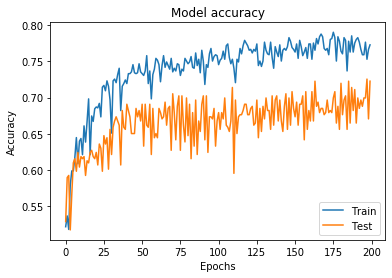

In [71]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Activation function- Tanh and sigmoid

### Experimenting with hidden layer and hyperparameters: epochs=150 and batch_size=40

In [72]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=150, batch_size=40)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/150
805/805 [==============================] - 1s 1ms/sample - loss: 0.6972 - accuracy: 0.5503 - val_loss: 0.7156 - val_accuracy: 0.5434
Epoch 2/150
805/805 [==============================] - 0s 109us/sample - loss: 0.6841 - accuracy: 0.5503 - val_loss: 0.6975 - val_accuracy: 0.5462
Epoch 3/150
805/805 [==============================] - 0s 124us/sample - loss: 0.6769 - accuracy: 0.5516 - val_loss: 0.6917 - val_accuracy: 0.5462
Epoch 4/150
805/805 [==============================] - 0s 120us/sample - loss: 0.6715 - accuracy: 0.5702 - val_loss: 0.6980 - val_accuracy: 0.5145
Epoch 5/150
805/805 [==============================] - 0s 114us/sample - loss: 0.6714 - accuracy: 0.5814 - val_loss: 0.6929 - val_accuracy: 0.5145
Epoch 6/150
805/805 [==============================] - 0s 98us/sample - loss: 0.6651 - accuracy: 0.5988 - val_loss: 0.6915 - val_accuracy: 0.5058
Epoch 7/150
805/805 [==============================] - 0s 122us/sample - lo

805/805 [==============================] - 0s 182us/sample - loss: 0.4140 - accuracy: 0.8075 - val_loss: 0.6176 - val_accuracy: 0.6647
Epoch 112/150
805/805 [==============================] - 0s 166us/sample - loss: 0.4421 - accuracy: 0.7863 - val_loss: 0.6281 - val_accuracy: 0.6618
Epoch 113/150
805/805 [==============================] - 0s 214us/sample - loss: 0.4410 - accuracy: 0.7913 - val_loss: 0.6159 - val_accuracy: 0.6503
Epoch 114/150
805/805 [==============================] - 0s 217us/sample - loss: 0.4226 - accuracy: 0.7988 - val_loss: 0.6522 - val_accuracy: 0.6474
Epoch 115/150
805/805 [==============================] - 0s 182us/sample - loss: 0.4155 - accuracy: 0.8087 - val_loss: 0.6162 - val_accuracy: 0.6647
Epoch 116/150
805/805 [==============================] - 0s 200us/sample - loss: 0.4151 - accuracy: 0.7988 - val_loss: 0.6189 - val_accuracy: 0.6676
Epoch 117/150
805/805 [==============================] - 0s 170us/sample - loss: 0.4100 - accuracy: 0.8112 - val_loss: 0

In [73]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.808695652173913
Accuracy Score for Test data: 0.653179190751445


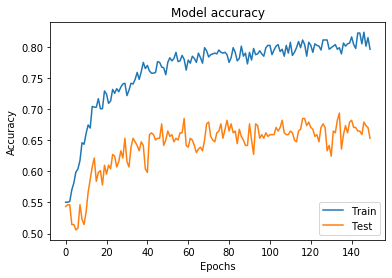

In [74]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=100 and batch_size=160

In [75]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=100, batch_size=160)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/100
805/805 [==============================] - 1s 1ms/sample - loss: 0.6953 - accuracy: 0.5304 - val_loss: 0.6840 - val_accuracy: 0.5751
Epoch 2/100
805/805 [==============================] - 0s 50us/sample - loss: 0.6872 - accuracy: 0.5478 - val_loss: 0.6883 - val_accuracy: 0.5376
Epoch 3/100
805/805 [==============================] - 0s 45us/sample - loss: 0.6815 - accuracy: 0.5739 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 4/100
805/805 [==============================] - 0s 48us/sample - loss: 0.6774 - accuracy: 0.5925 - val_loss: 0.6933 - val_accuracy: 0.5231
Epoch 5/100
805/805 [==============================] - 0s 49us/sample - loss: 0.6716 - accuracy: 0.5925 - val_loss: 0.6809 - val_accuracy: 0.5434
Epoch 6/100
805/805 [==============================] - 0s 44us/sample - loss: 0.6680 - accuracy: 0.5776 - val_loss: 0.6698 - val_accuracy: 0.5549
Epoch 7/100
805/805 [==============================] - 0s 49us/sample - loss: 0

In [76]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.7428571428571429
Accuracy Score for Test data: 0.661849710982659


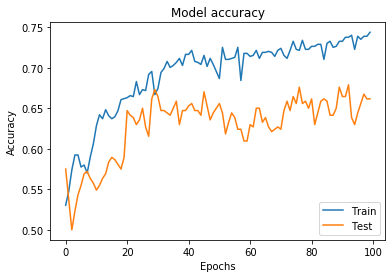

In [77]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=200 and batch_size=100

In [78]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=200, batch_size=100)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/200
805/805 [==============================] - 1s 1ms/sample - loss: 0.7072 - accuracy: 0.5354 - val_loss: 0.7091 - val_accuracy: 0.5116
Epoch 2/200
805/805 [==============================] - 0s 59us/sample - loss: 0.6867 - accuracy: 0.5528 - val_loss: 0.6909 - val_accuracy: 0.5202
Epoch 3/200
805/805 [==============================] - 0s 64us/sample - loss: 0.6743 - accuracy: 0.5652 - val_loss: 0.6856 - val_accuracy: 0.5116
Epoch 4/200
805/805 [==============================] - 0s 64us/sample - loss: 0.6706 - accuracy: 0.5752 - val_loss: 0.6815 - val_accuracy: 0.5202
Epoch 5/200
805/805 [==============================] - 0s 70us/sample - loss: 0.6646 - accuracy: 0.5814 - val_loss: 0.6739 - val_accuracy: 0.5462
Epoch 6/200
805/805 [==============================] - 0s 62us/sample - loss: 0.6612 - accuracy: 0.5665 - val_loss: 0.6678 - val_accuracy: 0.5434
Epoch 7/200
805/805 [==============================] - 0s 56us/sample - loss: 0

805/805 [==============================] - 0s 72us/sample - loss: 0.4715 - accuracy: 0.7801 - val_loss: 0.6686 - val_accuracy: 0.6561
Epoch 112/200
805/805 [==============================] - 0s 53us/sample - loss: 0.4626 - accuracy: 0.7789 - val_loss: 0.6405 - val_accuracy: 0.6618
Epoch 113/200
805/805 [==============================] - 0s 56us/sample - loss: 0.4712 - accuracy: 0.7814 - val_loss: 0.6683 - val_accuracy: 0.6387
Epoch 114/200
805/805 [==============================] - 0s 55us/sample - loss: 0.4654 - accuracy: 0.7702 - val_loss: 0.6344 - val_accuracy: 0.6416
Epoch 115/200
805/805 [==============================] - 0s 64us/sample - loss: 0.4741 - accuracy: 0.7714 - val_loss: 0.6246 - val_accuracy: 0.6763
Epoch 116/200
805/805 [==============================] - 0s 83us/sample - loss: 0.4623 - accuracy: 0.7826 - val_loss: 0.6436 - val_accuracy: 0.6387
Epoch 117/200
805/805 [==============================] - 0s 68us/sample - loss: 0.4554 - accuracy: 0.7851 - val_loss: 0.6416 -

In [79]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.8062111801242235
Accuracy Score for Test data: 0.6647398843930635


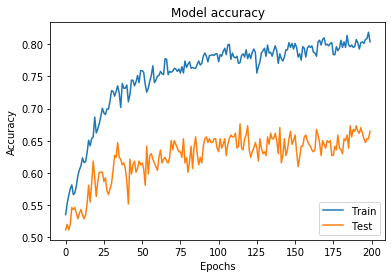

In [80]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Activation function- Sigmoid

### Experimenting with hidden layer and hyperparameters: epochs=150 and batch_size=40

In [81]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=150, batch_size=40)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/150
805/805 [==============================] - 1s 1ms/sample - loss: 0.6995 - accuracy: 0.4957 - val_loss: 0.6831 - val_accuracy: 0.6127
Epoch 2/150
805/805 [==============================] - 0s 89us/sample - loss: 0.6946 - accuracy: 0.4944 - val_loss: 0.6929 - val_accuracy: 0.5491
Epoch 3/150
805/805 [==============================] - 0s 98us/sample - loss: 0.6932 - accuracy: 0.5043 - val_loss: 0.6967 - val_accuracy: 0.3873
Epoch 4/150
805/805 [==============================] - 0s 91us/sample - loss: 0.6926 - accuracy: 0.5068 - val_loss: 0.6959 - val_accuracy: 0.3931
Epoch 5/150
805/805 [==============================] - 0s 100us/sample - loss: 0.6919 - accuracy: 0.5031 - val_loss: 0.6959 - val_accuracy: 0.3873
Epoch 6/150
805/805 [==============================] - 0s 117us/sample - loss: 0.6903 - accuracy: 0.5876 - val_loss: 0.6885 - val_accuracy: 0.6156
Epoch 7/150
805/805 [==============================] - 0s 122us/sample - loss

805/805 [==============================] - 0s 174us/sample - loss: 0.4136 - accuracy: 0.8186 - val_loss: 0.5735 - val_accuracy: 0.7023
Epoch 112/150
805/805 [==============================] - 0s 200us/sample - loss: 0.4139 - accuracy: 0.8149 - val_loss: 0.5580 - val_accuracy: 0.7081
Epoch 113/150
805/805 [==============================] - 0s 197us/sample - loss: 0.4106 - accuracy: 0.8062 - val_loss: 0.6206 - val_accuracy: 0.6647
Epoch 114/150
805/805 [==============================] - 0s 183us/sample - loss: 0.4267 - accuracy: 0.8037 - val_loss: 0.5878 - val_accuracy: 0.6821
Epoch 115/150
805/805 [==============================] - 0s 187us/sample - loss: 0.4167 - accuracy: 0.8075 - val_loss: 0.5702 - val_accuracy: 0.6965
Epoch 116/150
805/805 [==============================] - 0s 177us/sample - loss: 0.4120 - accuracy: 0.8075 - val_loss: 0.5584 - val_accuracy: 0.7139
Epoch 117/150
805/805 [==============================] - 0s 207us/sample - loss: 0.4073 - accuracy: 0.8186 - val_loss: 0

In [82]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.8335403726708075
Accuracy Score for Test data: 0.7109826589595376


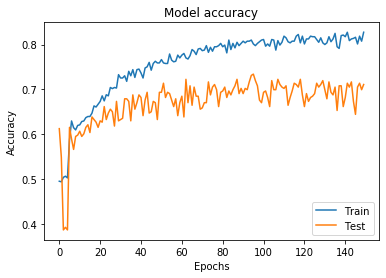

In [83]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=100 and batch_size=160

In [84]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=100, batch_size=160)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/100
805/805 [==============================] - 1s 1ms/sample - loss: 0.7330 - accuracy: 0.4957 - val_loss: 0.6679 - val_accuracy: 0.6127
Epoch 2/100
805/805 [==============================] - 0s 44us/sample - loss: 0.7238 - accuracy: 0.4957 - val_loss: 0.6675 - val_accuracy: 0.6127
Epoch 3/100
805/805 [==============================] - 0s 52us/sample - loss: 0.7170 - accuracy: 0.4957 - val_loss: 0.6678 - val_accuracy: 0.6127
Epoch 4/100
805/805 [==============================] - 0s 47us/sample - loss: 0.7124 - accuracy: 0.4957 - val_loss: 0.6682 - val_accuracy: 0.6127
Epoch 5/100
805/805 [==============================] - 0s 47us/sample - loss: 0.7097 - accuracy: 0.4957 - val_loss: 0.6691 - val_accuracy: 0.6127
Epoch 6/100
805/805 [==============================] - 0s 49us/sample - loss: 0.7062 - accuracy: 0.4957 - val_loss: 0.6703 - val_accuracy: 0.6127
Epoch 7/100
805/805 [==============================] - 0s 49us/sample - loss: 0

In [85]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.6869565217391305
Accuracy Score for Test data: 0.5895953757225434


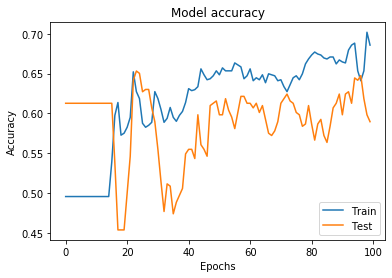

In [86]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=200 and batch_size=160

In [87]:
np.random.seed(22)
model = Sequential()
model.add(Dense(19, input_dim=19, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m1=model.fit(X_train2, y_train2,validation_data =(X_test2,y_test2), epochs=200, batch_size=100)
y_pred_train2=np.round(model.predict(X_train2),0)
y_pred_test2=np.round(model.predict(X_test2),0)
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Train on 805 samples, validate on 346 samples
Epoch 1/200
805/805 [==============================] - 1s 1ms/sample - loss: 0.7003 - accuracy: 0.5043 - val_loss: 0.7218 - val_accuracy: 0.3873
Epoch 2/200
805/805 [==============================] - 0s 60us/sample - loss: 0.6948 - accuracy: 0.5043 - val_loss: 0.7101 - val_accuracy: 0.3873
Epoch 3/200
805/805 [==============================] - 0s 63us/sample - loss: 0.6925 - accuracy: 0.5043 - val_loss: 0.7026 - val_accuracy: 0.3873
Epoch 4/200
805/805 [==============================] - 0s 64us/sample - loss: 0.6911 - accuracy: 0.5031 - val_loss: 0.6961 - val_accuracy: 0.5145
Epoch 5/200
805/805 [==============================] - 0s 75us/sample - loss: 0.6906 - accuracy: 0.5379 - val_loss: 0.6913 - val_accuracy: 0.5491
Epoch 6/200
805/805 [==============================] - 0s 66us/sample - loss: 0.6905 - accuracy: 0.5528 - val_loss: 0.6872 - val_accuracy: 0.5520
Epoch 7/200
805/805 [==============================] - 0s 57us/sample - loss: 0

Epoch 112/200
805/805 [==============================] - 0s 64us/sample - loss: 0.5134 - accuracy: 0.7553 - val_loss: 0.5817 - val_accuracy: 0.6936
Epoch 113/200
805/805 [==============================] - 0s 67us/sample - loss: 0.5147 - accuracy: 0.7466 - val_loss: 0.5969 - val_accuracy: 0.6590
Epoch 114/200
805/805 [==============================] - 0s 59us/sample - loss: 0.5128 - accuracy: 0.7553 - val_loss: 0.5741 - val_accuracy: 0.6994
Epoch 115/200
805/805 [==============================] - 0s 62us/sample - loss: 0.5297 - accuracy: 0.7366 - val_loss: 0.5717 - val_accuracy: 0.6965
Epoch 116/200
805/805 [==============================] - 0s 55us/sample - loss: 0.5178 - accuracy: 0.7578 - val_loss: 0.6365 - val_accuracy: 0.6358
Epoch 117/200
805/805 [==============================] - 0s 57us/sample - loss: 0.5226 - accuracy: 0.7491 - val_loss: 0.5981 - val_accuracy: 0.6763
Epoch 118/200
805/805 [==============================] - 0s 60us/sample - loss: 0.5125 - accuracy: 0.7578 - val_

In [88]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train2,y_pred_train2))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test2,y_pred_test2))

Accuracy Score for Train data: 0.7838509316770186
Accuracy Score for Test data: 0.6791907514450867


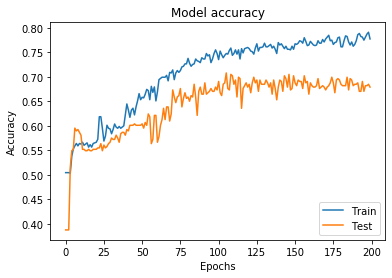

In [89]:
plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Dataset - Runtime

In [93]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [94]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [96]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=150, batch_size=10)

Train on 169120 samples, validate on 72480 samples
Epoch 1/150
169120/169120 [==============================] - 66s 393us/sample - loss: 0.3031 - accuracy: 0.8813 - val_loss: 0.1998 - val_accuracy: 0.9155
Epoch 2/150
169120/169120 [==============================] - 61s 360us/sample - loss: 0.1928 - accuracy: 0.9172 - val_loss: 0.1694 - val_accuracy: 0.9273
Epoch 3/150
169120/169120 [==============================] - 62s 369us/sample - loss: 0.1654 - accuracy: 0.9284 - val_loss: 0.1535 - val_accuracy: 0.9336
Epoch 4/150
169120/169120 [==============================] - 59s 350us/sample - loss: 0.1552 - accuracy: 0.9329 - val_loss: 0.1467 - val_accuracy: 0.9376
Epoch 5/150
169120/169120 [==============================] - 73s 433us/sample - loss: 0.1478 - accuracy: 0.9368 - val_loss: 0.1457 - val_accuracy: 0.9375
Epoch 6/150
169120/169120 [==============================] - 63s 375us/sample - loss: 0.1435 - accuracy: 0.9388 - val_loss: 0.1375 - val_accuracy: 0.9419
Epoch 7/150
169120/169120

Epoch 106/150
169120/169120 [==============================] - 71s 419us/sample - loss: 0.0884 - accuracy: 0.9649 - val_loss: 0.0834 - val_accuracy: 0.9666
Epoch 107/150
169120/169120 [==============================] - 70s 411us/sample - loss: 0.0881 - accuracy: 0.9649 - val_loss: 0.0928 - val_accuracy: 0.9609
Epoch 108/150
169120/169120 [==============================] - 69s 407us/sample - loss: 0.0886 - accuracy: 0.9650 - val_loss: 0.0878 - val_accuracy: 0.9666
Epoch 109/150
169120/169120 [==============================] - 71s 420us/sample - loss: 0.0886 - accuracy: 0.9646 - val_loss: 0.0908 - val_accuracy: 0.9634
Epoch 110/150
169120/169120 [==============================] - 71s 423us/sample - loss: 0.0882 - accuracy: 0.9648 - val_loss: 0.0857 - val_accuracy: 0.9662
Epoch 111/150
169120/169120 [==============================] - 70s 416us/sample - loss: 0.0881 - accuracy: 0.9652 - val_loss: 0.0896 - val_accuracy: 0.9646
Epoch 112/150
169120/169120 [==============================] - 4

In [100]:
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

In [101]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9668519394512772
Accuracy Score for Test data: 0.9655353200883002


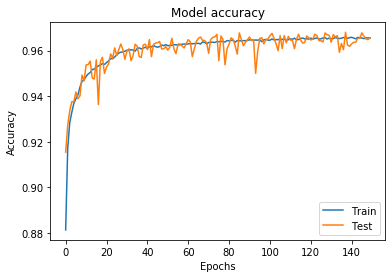

In [102]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Activation function- Relu and sigmoid

### Experimenting with hidden layer and hyperparameters: epochs=100 and batch_size=150

In [103]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=100, batch_size=150)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/100
169120/169120 [==============================] - 2s 13us/sample - loss: 0.5185 - accuracy: 0.7796 - val_loss: 0.3724 - val_accuracy: 0.8871
Epoch 2/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.3132 - accuracy: 0.8976 - val_loss: 0.2707 - val_accuracy: 0.9077
Epoch 3/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2493 - accuracy: 0.9098 - val_loss: 0.2376 - val_accuracy: 0.9090
Epoch 4/100
169120/169120 [==============================] - 2s 10us/sample - loss: 0.2200 - accuracy: 0.9143 - val_loss: 0.2086 - val_accuracy: 0.9185
Epoch 5/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2034 - accuracy: 0.9189 - val_loss: 0.1960 - val_accuracy: 0.9216
Epoch 6/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.1929 - accuracy: 0.9216 - val_loss: 0.2010 - val_accuracy: 0.9206
Epoch 7/100
169120/169120 [==========

In [104]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9583668401135289
Accuracy Score for Test data: 0.9577676600441501


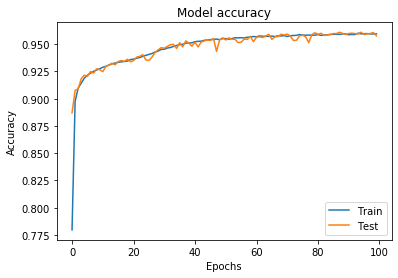

In [105]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=80 and batch_size=20

In [106]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=80, batch_size=20)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/80
169120/169120 [==============================] - 13s 76us/sample - loss: 0.2858 - accuracy: 0.8745 - val_loss: 0.2101 - val_accuracy: 0.9053
Epoch 2/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.2016 - accuracy: 0.9104 - val_loss: 0.1898 - val_accuracy: 0.9154
Epoch 3/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.1859 - accuracy: 0.9188 - val_loss: 0.1831 - val_accuracy: 0.9220
Epoch 4/80
169120/169120 [==============================] - 12s 74us/sample - loss: 0.1759 - accuracy: 0.9241 - val_loss: 0.1692 - val_accuracy: 0.9272
Epoch 5/80
169120/169120 [==============================] - 13s 74us/sample - loss: 0.1660 - accuracy: 0.9276 - val_loss: 0.1602 - val_accuracy: 0.9322
Epoch 6/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.1564 - accuracy: 0.9325 - val_loss: 0.1477 - val_accuracy: 0.9355
Epoch 7/80
169120/169120 [===========

In [107]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9572374645222327
Accuracy Score for Test data: 0.9570778145695364


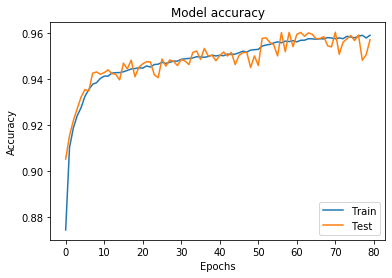

In [108]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=50 and batch_size=150

In [109]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=50, batch_size=150)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/50
169120/169120 [==============================] - 3s 15us/sample - loss: 0.4690 - accuracy: 0.8154 - val_loss: 0.2777 - val_accuracy: 0.8858
Epoch 2/50
169120/169120 [==============================] - 2s 13us/sample - loss: 0.2622 - accuracy: 0.8894 - val_loss: 0.2472 - val_accuracy: 0.8943
Epoch 3/50
169120/169120 [==============================] - 2s 13us/sample - loss: 0.2289 - accuracy: 0.9010 - val_loss: 0.2092 - val_accuracy: 0.9105
Epoch 4/50
169120/169120 [==============================] - 2s 13us/sample - loss: 0.2012 - accuracy: 0.9130 - val_loss: 0.1938 - val_accuracy: 0.9166
Epoch 5/50
169120/169120 [==============================] - 2s 13us/sample - loss: 0.1857 - accuracy: 0.9201 - val_loss: 0.1779 - val_accuracy: 0.9242
Epoch 6/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.1780 - accuracy: 0.9237 - val_loss: 0.1735 - val_accuracy: 0.9248
Epoch 7/50
169120/169120 [=================

In [110]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9597386471144749
Accuracy Score for Test data: 0.9582781456953643


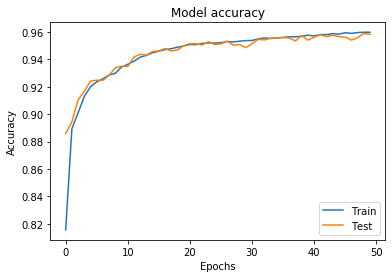

In [111]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Activation function- tanh and sigmoid

### Experimenting with hidden layer and hyperparameters: epochs=100 and batch_size=150

In [112]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=100, batch_size=150)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/100
169120/169120 [==============================] - 2s 13us/sample - loss: 0.4430 - accuracy: 0.7920 - val_loss: 0.3054 - val_accuracy: 0.8670
Epoch 2/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2740 - accuracy: 0.8797 - val_loss: 0.2537 - val_accuracy: 0.8859
Epoch 3/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2405 - accuracy: 0.8937 - val_loss: 0.2294 - val_accuracy: 0.8990
Epoch 4/100
169120/169120 [==============================] - 2s 12us/sample - loss: 0.2236 - accuracy: 0.8999 - val_loss: 0.2205 - val_accuracy: 0.9006
Epoch 5/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2156 - accuracy: 0.9030 - val_loss: 0.2113 - val_accuracy: 0.9072
Epoch 6/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2070 - accuracy: 0.9078 - val_loss: 0.2016 - val_accuracy: 0.9115
Epoch 7/100
169120/169120 [==========

In [113]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9404801324503311
Accuracy Score for Test data: 0.939114238410596


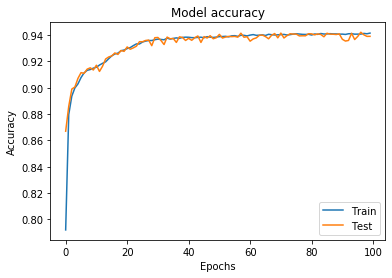

In [114]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=80 and batch_size=20

In [115]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=80, batch_size=20)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/80
169120/169120 [==============================] - 13s 75us/sample - loss: 0.3156 - accuracy: 0.8520 - val_loss: 0.2454 - val_accuracy: 0.8815
Epoch 2/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.2240 - accuracy: 0.9004 - val_loss: 0.2086 - val_accuracy: 0.9103
Epoch 3/80
169120/169120 [==============================] - 12s 72us/sample - loss: 0.1885 - accuracy: 0.9188 - val_loss: 0.1795 - val_accuracy: 0.9233
Epoch 4/80
169120/169120 [==============================] - 12s 72us/sample - loss: 0.1735 - accuracy: 0.9239 - val_loss: 0.1699 - val_accuracy: 0.9256
Epoch 5/80
169120/169120 [==============================] - 12s 72us/sample - loss: 0.1684 - accuracy: 0.9262 - val_loss: 0.1823 - val_accuracy: 0.9194
Epoch 6/80
169120/169120 [==============================] - 12s 72us/sample - loss: 0.1636 - accuracy: 0.9280 - val_loss: 0.1555 - val_accuracy: 0.9308
Epoch 7/80
169120/169120 [===========

In [116]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9543105487228004
Accuracy Score for Test data: 0.953325055187638


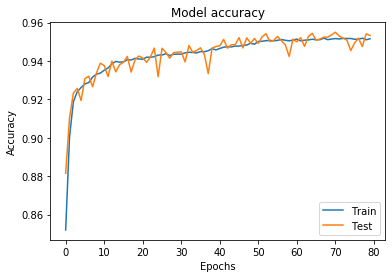

In [117]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=50 and batch_size=150

In [118]:
np.random.seed(22)
model = Sequential()
model.add(Dense(15, input_dim=15, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=50, batch_size=150)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/50
169120/169120 [==============================] - 2s 13us/sample - loss: 0.4487 - accuracy: 0.7854 - val_loss: 0.3041 - val_accuracy: 0.8734
Epoch 2/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2851 - accuracy: 0.8770 - val_loss: 0.2728 - val_accuracy: 0.8822
Epoch 3/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2553 - accuracy: 0.8912 - val_loss: 0.2467 - val_accuracy: 0.8952
Epoch 4/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2358 - accuracy: 0.9006 - val_loss: 0.2351 - val_accuracy: 0.9023
Epoch 5/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2209 - accuracy: 0.9094 - val_loss: 0.2184 - val_accuracy: 0.9096
Epoch 6/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2103 - accuracy: 0.9137 - val_loss: 0.2068 - val_accuracy: 0.9144
Epoch 7/50
169120/169120 [=================

In [119]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.949308183538316
Accuracy Score for Test data: 0.9498758278145696


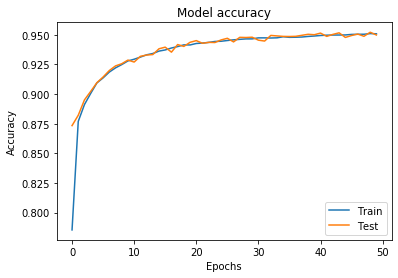

In [120]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Activation function- sigmoid

### Experimenting with hidden layer and hyperparameters: epochs=100 and batch_size=150

In [121]:
np.random.seed(22)
model = Sequential()
model.add(Dense(14, input_dim=14, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=100, batch_size=150)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/100
169120/169120 [==============================] - 2s 13us/sample - loss: 0.5529 - accuracy: 0.7386 - val_loss: 0.3562 - val_accuracy: 0.8689
Epoch 2/100
169120/169120 [==============================] - 2s 10us/sample - loss: 0.3161 - accuracy: 0.8754 - val_loss: 0.2783 - val_accuracy: 0.8853
Epoch 3/100
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2594 - accuracy: 0.8959 - val_loss: 0.2492 - val_accuracy: 0.9007
Epoch 4/100
169120/169120 [==============================] - 2s 10us/sample - loss: 0.2377 - accuracy: 0.9019 - val_loss: 0.2325 - val_accuracy: 0.8976
Epoch 5/100
169120/169120 [==============================] - 2s 10us/sample - loss: 0.2205 - accuracy: 0.9064 - val_loss: 0.2159 - val_accuracy: 0.9104
Epoch 6/100
169120/169120 [==============================] - 2s 10us/sample - loss: 0.2103 - accuracy: 0.9130 - val_loss: 0.2078 - val_accuracy: 0.9134
Epoch 7/100
169120/169120 [==========

In [122]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9559720908230842
Accuracy Score for Test data: 0.9546495584988962


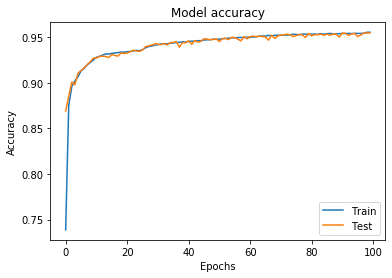

In [123]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=80 and batch_size=20

In [124]:
np.random.seed(22)
model = Sequential()
model.add(Dense(14, input_dim=14, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=80, batch_size=20)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/80
169120/169120 [==============================] - 12s 74us/sample - loss: 0.3129 - accuracy: 0.8711 - val_loss: 0.2333 - val_accuracy: 0.9101
Epoch 2/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.2239 - accuracy: 0.9139 - val_loss: 0.2155 - val_accuracy: 0.9173
Epoch 3/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.2075 - accuracy: 0.9194 - val_loss: 0.2135 - val_accuracy: 0.9118
Epoch 4/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.1897 - accuracy: 0.9238 - val_loss: 0.1793 - val_accuracy: 0.9279
Epoch 5/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.1738 - accuracy: 0.9285 - val_loss: 0.1843 - val_accuracy: 0.9248
Epoch 6/80
169120/169120 [==============================] - 12s 73us/sample - loss: 0.1633 - accuracy: 0.9320 - val_loss: 0.1548 - val_accuracy: 0.9367
Epoch 7/80
169120/169120 [===========

In [125]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9590763954588458
Accuracy Score for Test data: 0.9595198675496689


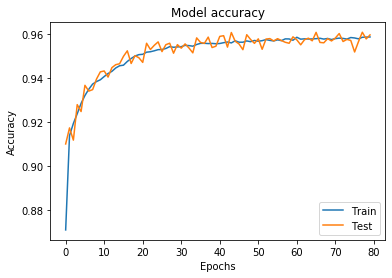

In [126]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

### Experimenting with hidden layer and hyperparameters: epochs=50 and batch_size=150

In [127]:
np.random.seed(22)
model = Sequential()
model.add(Dense(14, input_dim=14, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
m2=model.fit(X_train, y_train,validation_data =(X_test,y_test), epochs=50, batch_size=150)
y_pred_train=np.round(model.predict(X_train),0)
y_pred_test=np.round(model.predict(X_test),0)

Train on 169120 samples, validate on 72480 samples
Epoch 1/50
169120/169120 [==============================] - 2s 14us/sample - loss: 0.4817 - accuracy: 0.8134 - val_loss: 0.3396 - val_accuracy: 0.8718
Epoch 2/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.3249 - accuracy: 0.8746 - val_loss: 0.3124 - val_accuracy: 0.8787
Epoch 3/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.3102 - accuracy: 0.8779 - val_loss: 0.3042 - val_accuracy: 0.8767
Epoch 4/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.3021 - accuracy: 0.8814 - val_loss: 0.2968 - val_accuracy: 0.8842
Epoch 5/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2936 - accuracy: 0.8867 - val_loss: 0.2818 - val_accuracy: 0.8932
Epoch 6/50
169120/169120 [==============================] - 2s 11us/sample - loss: 0.2799 - accuracy: 0.8954 - val_loss: 0.2733 - val_accuracy: 0.8984
Epoch 7/50
169120/169120 [=================

In [128]:
print('Accuracy Score for Train data:',metrics.accuracy_score(y_train,y_pred_train))
print('Accuracy Score for Test data:',metrics.accuracy_score(y_test,y_pred_test))

Accuracy Score for Train data: 0.9412724692526017
Accuracy Score for Test data: 0.9401903973509934


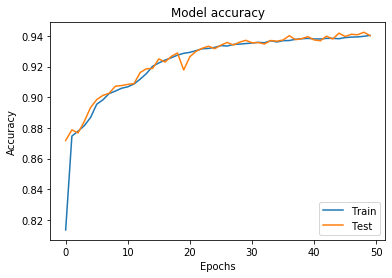

In [129]:
plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()